In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
train_path = '/content/train'
val_path = '/content/val'

In [ ]:
import shutil
## creating data for validation
'''for dir in os.listdir(train_path):
    if not os.path.exists(os.path.join(val_path ,dir)):
        os.mkdir(os.path.join(val_path ,dir)) 
    moving_path = os.path.join(val_path,dir)
    print('moving image...')
    chosen_path = os.listdir(os.path.join(train_path,dir))
    for i in range(30):
        image_name = chosen_path[i]
        image_path = os.path.join(os.path.join(train_path,dir),image_name)
        target_path = os.path.join(moving_path,image_name)
        
        shutil.move(image_path,target_path)
print('shifted')'''

"for dir in os.listdir(train_path):\n    if not os.path.exists(os.path.join(val_path ,dir)):\n        os.mkdir(os.path.join(val_path ,dir)) \n    moving_path = os.path.join(val_path,dir)\n    print('moving image...')\n    chosen_path = os.listdir(os.path.join(train_path,dir))\n    for i in range(30):\n        image_name = chosen_path[i]\n        image_path = os.path.join(os.path.join(train_path,dir),image_name)\n        target_path = os.path.join(moving_path,image_name)\n        \n        shutil.move(image_path,target_path)\nprint('shifted')"

In [ ]:
## Training dataset augumentaion!!
train_datagen = image.ImageDataGenerator(
                    rescale = 1./255,
                    shear_range = 0.2,
                    zoom_range = 0.2,

)
## Val dataset normalization!!
val_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
##train datageneration
train_generator = train_datagen.flow_from_directory(
                        train_path,
                        target_size = (244,244),
                        batch_size = 32,
                        class_mode = 'categorical'
                        )

Found 13950 images belonging to 37 classes.


In [ ]:
train_generator.class_indices


{'black_dress': 0,
 'black_pants': 1,
 'black_shirt': 2,
 'black_shoes': 3,
 'black_shorts': 4,
 'black_suit': 5,
 'blue_dress': 6,
 'blue_pants': 7,
 'blue_shirt': 8,
 'blue_shoes': 9,
 'blue_shorts': 10,
 'brown_hoodie': 11,
 'brown_pants': 12,
 'brown_shoes': 13,
 'green_pants': 14,
 'green_shirt': 15,
 'green_shoes': 16,
 'green_shorts': 17,
 'green_suit': 18,
 'pink_hoodie': 19,
 'pink_pants': 20,
 'pink_skirt': 21,
 'red_dress': 22,
 'red_hoodie': 23,
 'red_pants': 24,
 'red_shirt': 25,
 'red_shoes': 26,
 'silver_shoes': 27,
 'silver_skirt': 28,
 'white_dress': 29,
 'white_pants': 30,
 'white_shoes': 31,
 'white_shorts': 32,
 'white_suit': 33,
 'yellow_dress': 34,
 'yellow_shorts': 35,
 'yellow_skirt': 36}

In [ ]:
##validation data generator
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size = (244,244),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2220 images belonging to 37 classes.


In [ ]:
val_generator.class_indices

{'black_dress': 0,
 'black_pants': 1,
 'black_shirt': 2,
 'black_shoes': 3,
 'black_shorts': 4,
 'black_suit': 5,
 'blue_dress': 6,
 'blue_pants': 7,
 'blue_shirt': 8,
 'blue_shoes': 9,
 'blue_shorts': 10,
 'brown_hoodie': 11,
 'brown_pants': 12,
 'brown_shoes': 13,
 'green_pants': 14,
 'green_shirt': 15,
 'green_shoes': 16,
 'green_shorts': 17,
 'green_suit': 18,
 'pink_hoodie': 19,
 'pink_pants': 20,
 'pink_skirt': 21,
 'red_dress': 22,
 'red_hoodie': 23,
 'red_pants': 24,
 'red_shirt': 25,
 'red_shoes': 26,
 'silver_shoes': 27,
 'silver_skirt': 28,
 'white_dress': 29,
 'white_pants': 30,
 'white_shoes': 31,
 'white_shorts': 32,
 'white_suit': 33,
 'yellow_dress': 34,
 'yellow_shorts': 35,
 'yellow_skirt': 36}

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3),padding='same', activation = 'relu', input_shape = (244,244,3), kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3),padding='same', activation = 'relu'))
model.add(Conv2D(128, (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(37, activation='softmax'))

model.compile(optimizer='adam', loss = tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 244, 244, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 242, 242, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 121, 121, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 117, 117, 128)     409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 128)       0

In [ ]:
hist = model.fit(train_generator, steps_per_epoch=128, epochs=20,validation_data=val_generator, validation_steps=32)

Epoch 1/20
128/128 [==============================] - 68s 506ms/step - loss: 4.9266 - accuracy: 0.1527 - val_loss: 2.1253 - val_accuracy: 0.3975
Epoch 2/20
128/128 [==============================] - 63s 493ms/step - loss: 1.7812 - accuracy: 0.5140 - val_loss: 1.5102 - val_accuracy: 0.5664
Epoch 3/20
128/128 [==============================] - 63s 493ms/step - loss: 1.2627 - accuracy: 0.6262 - val_loss: 1.3641 - val_accuracy: 0.6094
Epoch 4/20
128/128 [==============================] - 63s 489ms/step - loss: 1.1045 - accuracy: 0.6763 - val_loss: 1.2624 - val_accuracy: 0.6172
Epoch 5/20
128/128 [==============================] - 63s 490ms/step - loss: 1.0316 - accuracy: 0.6912 - val_loss: 0.9885 - val_accuracy: 0.7168
Epoch 6/20
128/128 [==============================] - 63s 489ms/step - loss: 0.9548 - accuracy: 0.7137 - val_loss: 0.9194 - val_accuracy: 0.7246
Epoch 7/20
128/128 [==============================] - 63s 491ms/step - loss: 0.8506 - accuracy: 0.7396 - val_loss: 0.8035 - val_ac

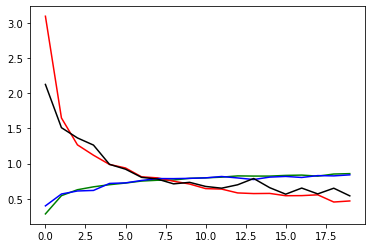

In [ ]:
plt.figure(0)
plt.plot(hist.history['accuracy'], 'g')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.plot(hist.history['val_loss'], 'black')
plt.show()